In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
warnings.filterwarnings('ignore')

In [3]:
input_shape=(64,64,3)

In [4]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/test',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=82,
        epochs=200,
        validation_data=validation_generator,
        validation_steps=82)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/200
82/82 [==============================] - 109s 1s/step - loss: 0.6018 - accuracy: 0.7205 - val_loss: 0.5363 - val_accuracy: 0.6731
Epoch 2/200
82/82 [==============================] - 52s 638ms/step - loss: 0.3944 - accuracy: 0.8255
Epoch 3/200
82/82 [==============================] - 52s 627ms/step - loss: 0.2868 - accuracy: 0.8731
Epoch 4/200
82/82 [==============================] - 52s 629ms/step - loss: 0.2500 - accuracy: 0.9026
Epoch 5/200
82/82 [==============================] - 51s 623ms/step - loss: 0.2068 - accuracy: 0.9185
Epoch 6/200
82/82 [==============================] - 52s 631ms/step - loss: 0.1720 - accuracy: 0.9331
Epoch 7/200
82/82 [==============================] - 51s 618ms/step - loss: 0.1747 - accuracy: 0.9328
Epoch 8/200
82/82 [==============================] - 52s 631ms/step - loss: 0.1617 - accuracy: 0.9381
Epoch 9/200
82/82 [==============================] - 52s 629m

In [7]:
scores = model.evaluate(validation_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 5s 477ms/step - loss: 0.6241 - accuracy: 0.9151
Loss of the model: 0.62
Test Accuracy: 91.51%


In [8]:
# Saving the model for future use
model.save('custom_model.h5py')

[[1.]]
This image is 100.00 percent PNEUMONIA


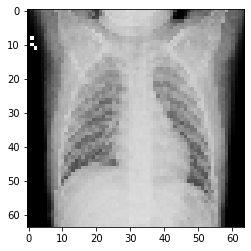

In [9]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('custom_model.h5py')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        stat = prediction[0] * 100 
        print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "NORMAL"))

   
predict_image("../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg")
